In [8]:
from furlib import *
import numpy as np
%matplotlib nbagg

In [9]:
ABB = Manipulator((70,pi/2,352,t1), (360,0,0,t2), (0,pi/2,0,t3),(0,-pi/2,380,t4),(0,pi/2,0,t5),(0,0,65,t6))
T = ABB.T

In [10]:
#T

## Inverse Kinematics

In [11]:
deg = lambda x: (x*180/pi).evalf()
rad = lambda x: (x*pi/180).evalf()

phi,theta,psi = pi/2,pi/3,pi/3
MR = ea2htm(phi,theta,psi)
d1,l1,l2,d4,d6 = 352,70,360,380,65
x,y,z = 500,100,1000

xm,ym,zm = x - d6*MR[0,2], y - d6*MR[1,2], z - d6*MR[2,2]
T1 = atan2(ym,xm).evalf(chop=True)
r = sqrt(xm**2 + ym**2)
a = r - l1
b = zm - d1
c = sqrt(a**2 + b**2)
alpha = atan2(b,a)
beta = acos((c**2 + l2**2 - d4**2)/(2*c*l2))
T2 = alpha - beta
T3 = pi/2 + acos((c**2 - l2**2 - d4**2)/(2*l2*d4))

R3_0 = ((ABB.Ts[0]*ABB.Ts[1]*ABB.Ts[2])[:3,:3]).subs({t1:T1,t2:T2,t3:T3}).evalf()
R6_0 = MR[:3,:3]
R6_3 = R3_0.inv()*R6_0
T4 = atan2(R6_3[1,2],R6_3[0,2]).evalf(chop=True)
K5 = R6_3[2,2]
T5 = atan2(sqrt(1-K5**2),K5).evalf(chop=True)
T6 = atan2(R6_3[2,1],-R6_3[2,0]).evalf(chop=True)

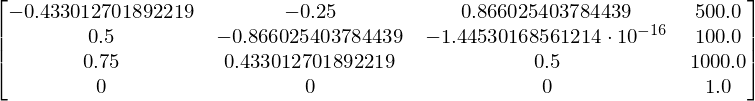

In [14]:
vals = {t1:T1,t2:T2,t3:T3,t4:T4,t5:T5,t6:T6}
T.subs(vals).evalf(chop=True)

In [16]:
ABB.plot_diagram(vals)

<IPython.core.display.Javascript object>

## Jacobiano

In [ ]:
J = ABB.J

In [ ]:
vp = []
wp = []
for t in np.linspace(0,np.pi):
    vals={t1:sin(t), t2:pi/2-sin(t), t3:-sin(t), t4:0, t5:-2*sin(3*t), t6:0}
    JN = J.subs(vals)
    TN = T.subs(vals)
    qv = Matrix([cos(t),-cos(t),-cos(t),0,-6*cos(3*t),0])
    vs = JN*qv.evalf()
    vp.append(vs[:3])
    wp.append(vs[3:])

In [ ]:
plt.subplot(2,1,1)
plt.plot(vp)
plt.legend(["$v_{px}$","$v_{py}$","$v_{pz}$"])
plt.subplot(2,1,2)
plt.plot(wp)
plt.legend(["$\\omega_x$","$\\omega_y$","$\\omega_z$"])